# HOUSING: PRICE PREDICTION.

# DATA DESCRIPTION

In [768]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score,recall_score,precision_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
	

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import warnings
warnings.filterwarnings('ignore')

In [769]:
df = pd.read_csv(r'train_house.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [770]:
df.shape

(1168, 81)

In [771]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [772]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [773]:
#from dataprep.eda import create_report
#create_report(df)

In [774]:
for i in df.columns:
    print("*******************************************************")
    print("Value counts of", i, "\n" )
    print("DataType:-",df[i].dtypes)
    if df[i].dtypes == 'object':
        print("Categorical Variable")
    else:
        print("Numerical Variable")
    print(df[i].value_counts())
    print("Null Values:-",df[i].isnull().sum())
    try:
        print("Range:-",df[i].min(),"TO",df[i].max())
    except:
        pass
    print('*******************************************************')

*******************************************************
Value counts of Id 

DataType:- int64
Numerical Variable
127     1
1391    1
1389    1
448     1
1179    1
       ..
1402    1
661     1
101     1
415     1
617     1
Name: Id, Length: 1168, dtype: int64
Null Values:- 0
Range:- 1 TO 1460
*******************************************************
*******************************************************
Value counts of MSSubClass 

DataType:- int64
Numerical Variable
20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
Null Values:- 0
Range:- 20 TO 190
*******************************************************
*******************************************************
Value counts of MSZoning 

DataType:- object
Categorical Variable
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
Null Values:- 0
R

Range:- FuseA TO SBrkr
*******************************************************
*******************************************************
Value counts of 1stFlrSF 

DataType:- int64
Numerical Variable
864     19
1040    13
912     12
894     10
848      9
        ..
1516     1
813      1
2633     1
1015     1
807      1
Name: 1stFlrSF, Length: 669, dtype: int64
Null Values:- 0
Range:- 334 TO 4692
*******************************************************
*******************************************************
Value counts of 2ndFlrSF 

DataType:- int64
Numerical Variable
0       663
728       9
504       7
600       6
672       6
       ... 
1066      1
467       1
1038      1
881       1
978       1
Name: 2ndFlrSF, Length: 351, dtype: int64
Null Values:- 0
Range:- 0 TO 2065
*******************************************************
*******************************************************
Value counts of LowQualFinSF 

DataType:- int64
Numerical Variable
0      1145
80        3
360       2
384  

0        1126
400        10
500         7
2000        4
600         3
700         3
1200        2
1150        1
480         1
1300        1
1400        1
8300        1
620         1
15500       1
450         1
800         1
54          1
350         1
560         1
2500        1
Name: MiscVal, dtype: int64
Null Values:- 0
Range:- 0 TO 15500
*******************************************************
*******************************************************
Value counts of MoSold 

DataType:- int64
Numerical Variable
6     203
7     187
5     166
4     113
8      95
3      87
11     67
10     66
9      57
12     46
1      44
2      37
Name: MoSold, dtype: int64
Null Values:- 0
Range:- 1 TO 12
*******************************************************
*******************************************************
Value counts of YrSold 

DataType:- int64
Numerical Variable
2007    264
2009    260
2006    254
2008    248
2010    142
Name: YrSold, dtype: int64
Null Values:- 0
Range:- 2006 TO 2010
********

In [775]:
df.isnull().sum().sort_values(ascending=False)

PoolQC         1161
MiscFeature    1124
Alley          1091
Fence           931
FireplaceQu     551
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [776]:
#find duplicates
df.duplicated().sum()

0

# Dropping Unnecessary Columns

In [777]:
#We shall drop the above mentioned features who either have 80-100% null values, or above 80% a single value

In [778]:
drop_columns= ['Id','LowQualFinSF','3SsnPorch','ScreenPorch','PoolArea','MiscVal','PoolQC','Fence','MiscFeature','Heating','RoofMatl','Condition2','Utilities','Street','Alley']
len(drop_columns)

15

In [779]:
df.drop(columns = drop_columns,inplace=True)

In [780]:
df.shape

(1168, 66)

In [781]:
df.isnull().sum().sort_values(ascending=False)

FireplaceQu    551
LotFrontage    214
GarageQual      64
GarageType      64
GarageYrBlt     64
              ... 
BsmtUnfSF        0
TotalBsmtSF      0
MSZoning         0
CentralAir       0
SalePrice        0
Length: 66, dtype: int64

In [782]:
#The most number of null values is in FireplaceQu feature
#That is because in all the 551 (47%) entries, the no of fire places as per the feature Fireplaces=0
#The quality of a fireplace cannot be filled when there is no fireplace present
#We cannot impute any other value as the FireplaceQu, where there is no fireplace present
#Hence, in order to not misguide the algorithm with a value; We shall drop the feature FireplaceQu

In [783]:
df.drop(columns = 'FireplaceQu' ,inplace=True)

In [784]:
null_features = df.isnull().sum().sort_values(ascending=False)

In [785]:
null_features[:14]

LotFrontage     214
GarageCond       64
GarageType       64
GarageYrBlt      64
GarageFinish     64
GarageQual       64
BsmtExposure     31
BsmtFinType2     31
BsmtQual         30
BsmtFinType1     30
BsmtCond         30
MasVnrArea        7
MasVnrType        7
MSSubClass        0
dtype: int64

In [786]:
#As we can see from above, all the features related to garage have 64 null entries each
#Hence, lets check whether all these 64 entries are falling in the same locations or not

In [787]:
df[df['GarageCond'].isnull() & df['GarageType'].isnull() & df['GarageYrBlt'].isnull() & df['GarageFinish'].isnull() & df['GarageQual'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,20,RL,50.0,5000,Reg,Low,Inside,Mod,BrkSide,Norm,...,NaN,N,0,0,0,1,2007,WD,Normal,39300
72,190,RM,60.0,6780,Reg,Lvl,Inside,Gtl,IDOTRR,Norm,...,NaN,N,53,0,0,6,2006,WD,Normal,84500
74,30,RH,70.0,4270,Reg,Bnk,Inside,Mod,Edwards,Norm,...,NaN,Y,0,0,286,5,2007,WD,Normal,79000
105,20,RL,70.0,10500,Reg,Lvl,FR2,Gtl,NAmes,Norm,...,NaN,Y,0,0,0,4,2010,ConLI,Normal,115000
116,20,RL,63.0,7500,Reg,Lvl,Inside,Gtl,SawyerW,Norm,...,NaN,Y,0,0,0,4,2008,WD,Normal,141000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,50,RM,52.0,6240,Reg,Lvl,Inside,Gtl,BrkSide,Norm,...,NaN,N,0,0,0,7,2006,WD,Normal,80500
1139,90,RL,81.0,11841,Reg,Lvl,Inside,Gtl,Edwards,Norm,...,NaN,Y,0,32,0,5,2007,WD,Normal,118500
1145,90,RL,94.0,9400,Reg,Low,Corner,Gtl,Mitchel,Norm,...,NaN,Y,128,0,0,4,2010,WD,Normal,139000
1149,50,RL,60.0,10800,Reg,Lvl,Inside,Gtl,NAmes,Norm,...,NaN,Y,0,0,0,12,2006,WD,Abnorml,135000


In [788]:
#There are 64 rows where all of these 5 features are null at the same time hence there is no point in filling null values for any of these rows
#To avoid adding arbitary values for the above rows, we shall drop them

In [789]:
df.drop(df.index[df['GarageCond'].isnull() & df['GarageType'].isnull() & df['GarageYrBlt'].isnull() & df['GarageFinish'].isnull() & df['GarageQual'].isnull()], inplace=True)

In [790]:
null_features = df.isnull().sum().sort_values(ascending=False)

In [791]:
null_features[:9]

LotFrontage     208
BsmtExposure     25
BsmtFinType2     25
BsmtQual         24
BsmtCond         24
BsmtFinType1     24
MasVnrArea        7
MasVnrType        7
Functional        0
dtype: int64

In [792]:
#As we can see from above, all the features related to basement have atleast 24 null entries each
#Hence, lets check whether all these 24 entries are falling in the same locations or not

In [793]:
df[df['BsmtExposure'].isnull() & df['BsmtFinType2'].isnull() & df['BsmtQual'].isnull() & df['BsmtCond'].isnull() & df['BsmtFinType1'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
34,60,RL,NaN,14762,IR2,Lvl,Corner,Gtl,Gilbert,Feedr,...,TA,P,120,144,0,5,2006,WD,Normal,169000
54,20,RL,60.0,11100,Reg,Low,Inside,Gtl,Edwards,Norm,...,TA,Y,0,0,0,4,2010,WD,Abnorml,84900
60,20,RL,60.0,7200,Reg,Lvl,Inside,Gtl,NAmes,Norm,...,TA,Y,0,0,0,4,2010,WD,Normal,107500
86,20,RL,60.0,7200,Reg,Lvl,Inside,Gtl,NAmes,Norm,...,TA,Y,0,0,0,6,2006,WD,Normal,109500
96,90,RH,60.0,8400,Reg,Lvl,Inside,Gtl,SawyerW,Feedr,...,TA,Y,0,0,0,10,2007,WD,Normal,144000
124,20,RL,60.0,7200,Reg,Lvl,Inside,Gtl,NAmes,Norm,...,TA,Y,0,29,0,7,2006,WD,Normal,109900
137,20,RL,NaN,8339,IR1,Lvl,Inside,Gtl,NAmes,Norm,...,TA,Y,0,0,0,7,2007,WD,Normal,106500
159,20,RL,NaN,6627,IR1,Lvl,Corner,Gtl,BrkSide,Feedr,...,Fa,Y,0,0,0,7,2008,WD,Normal,72500
226,20,RL,60.0,9060,Reg,Lvl,Inside,Gtl,Edwards,Artery,...,TA,Y,116,0,0,6,2007,WD,Normal,120000
267,20,RL,100.0,21750,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,TA,Y,0,0,0,11,2009,WD,Normal,115000


In [794]:
#There are 24 rows where all of these 5 features are null at the same time hence there is no point in filling null values for any of these rows
#To avoid adding arbitary values for the above rows, we shall drop them

In [795]:
df.drop(df.index[df['BsmtExposure'].isnull() & df['BsmtFinType2'].isnull() & df['BsmtQual'].isnull() & df['BsmtCond'].isnull() & df['BsmtFinType1'].isnull()], inplace=True)

In [796]:
null_features = df.isnull().sum().sort_values(ascending=False)

In [797]:
null_features[:5]

LotFrontage     202
MasVnrType        7
MasVnrArea        7
BsmtExposure      1
BsmtFinType2      1
dtype: int64

In [798]:
#As we can see from above, all the features related to veneer type have 7 null entries each
#Hence, lets check whether all these 7 entries are falling in the same locations or not

In [799]:
df[df['MasVnrType'].isnull() & df['MasVnrArea'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
68,20,RL,NaN,32668,IR1,Lvl,CulDSac,Gtl,Crawfor,Norm,...,TA,Y,0,0,200,3,2007,WD,Alloca,200624
78,20,RL,107.0,13891,Reg,Lvl,Inside,Gtl,NridgHt,Norm,...,TA,Y,216,229,0,9,2006,New,Partial,465000
99,60,FV,65.0,8125,Reg,Lvl,Inside,Gtl,Somerst,Norm,...,TA,Y,0,0,0,5,2008,WD,Normal,205950
185,20,FV,95.0,11639,Reg,Lvl,Corner,Gtl,Somerst,Norm,...,TA,Y,0,120,0,12,2008,New,Partial,182000
224,120,FV,35.0,4274,IR1,Lvl,Inside,Gtl,Somerst,Norm,...,TA,Y,0,116,0,11,2007,New,Partial,199900
367,60,RL,75.0,9473,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,TA,Y,0,211,0,3,2008,WD,Normal,237000
874,60,RL,NaN,7851,Reg,Lvl,Inside,Gtl,Gilbert,Norm,...,TA,Y,288,48,0,5,2010,WD,Normal,216500


In [800]:
#There are 7 rows where both of these features are null at the same time hence there is no point in filling null values for any of these rows
#To avoid adding arbitary values for the above rows, we shall drop them

In [801]:
df.drop(df.index[df['MasVnrType'].isnull() & df['MasVnrArea'].isnull()], inplace=True)

In [802]:
df.isnull().sum().sort_values(ascending=False)

LotFrontage     200
BsmtFinType2      1
BsmtExposure      1
MSSubClass        0
FullBath          0
               ... 
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
SalePrice         0
Length: 65, dtype: int64

In [803]:
df.shape

(1073, 65)

# IMPUTATION

In [ ]:
#let us now impute the Basement features with their mode using SIMPLE IMPUTER

In [804]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
columns = ['BsmtFinType2','BsmtExposure']
for i in columns:
    imputer = imputer.fit(df[[i]])
    df[i] = imputer.transform(df[[i]])

In [805]:
df=df.reset_index()

In [806]:
df.isnull().sum().sort_values(ascending=False)

LotFrontage     200
index             0
FullBath          0
Functional        0
TotRmsAbvGrd      0
               ... 
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
SalePrice         0
Length: 66, dtype: int64

In [ ]:
#We will use Iterative imputer for LotFrontage feature as there are 200 null entries in it 
#and iterative imputer will use regression to impute the values in it.
#we shall pass LotArea as the other parameter to the imputer

In [807]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iter_impute = IterativeImputer()
ite_imp = pd.DataFrame(np.round(iter_impute.fit_transform(df[['LotFrontage','LotArea']])),columns=['LotFrontage','LotArea'])
df[['LotFrontage','LotArea']]=ite_imp

In [808]:
df.isnull().sum().sort_values(ascending=False)

index           0
Fireplaces      0
CentralAir      0
Electrical      0
1stFlrSF        0
               ..
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
SalePrice       0
Length: 66, dtype: int64

In [809]:
df.drop(columns='index',inplace=True)

In [810]:
df.shape

(1073, 65)

In [811]:
for i in df.columns:
    print("*******************************************************")
    print("Value counts of", i, "\n" )
    print("DataType:-",df[i].dtypes)
    if df[i].dtypes == 'object':
        print("Categorical Variable")
    else:
        print("Numerical Variable")
    print(df[i].value_counts())
    print("Null Values:-",df[i].isnull().sum())
    try:
        print("Range:-",df[i].min(),"TO",df[i].max())
    except:
        pass
    print('*******************************************************')

*******************************************************
Value counts of MSSubClass 

DataType:- int64
Numerical Variable
20     402
60     240
50     102
120     68
70      51
160     45
80      43
30      38
90      21
190     19
85      18
75      12
45       8
40       3
180      3
Name: MSSubClass, dtype: int64
Null Values:- 0
Range:- 20 TO 190
*******************************************************
*******************************************************
Value counts of MSZoning 

DataType:- object
Categorical Variable
RL         860
RM         146
FV          49
RH          11
C (all)      7
Name: MSZoning, dtype: int64
Null Values:- 0
Range:- C (all) TO RM
*******************************************************
*******************************************************
Value counts of LotFrontage 

DataType:- float64
Numerical Variable
60.0     94
70.0     65
80.0     61
75.0     55
65.0     40
         ..
152.0     1
128.0     1
160.0     1
339.0     1
465.0     1
Name: LotFrontage

Name: BsmtFullBath, dtype: int64
Null Values:- 0
Range:- 0 TO 2
*******************************************************
*******************************************************
Value counts of BsmtHalfBath 

DataType:- int64
Numerical Variable
0    1011
1      61
2       1
Name: BsmtHalfBath, dtype: int64
Null Values:- 0
Range:- 0 TO 2
*******************************************************
*******************************************************
Value counts of FullBath 

DataType:- int64
Numerical Variable
2    575
1    468
3     24
0      6
Name: FullBath, dtype: int64
Null Values:- 0
Range:- 0 TO 3
*******************************************************
*******************************************************
Value counts of HalfBath 

DataType:- int64
Numerical Variable
0    643
1    422
2      8
Name: HalfBath, dtype: int64
Null Values:- 0
Range:- 0 TO 2
*******************************************************
*******************************************************
Value counts of Be

# ENCODING

In [ ]:
#We shall divide the categorical variables into two parts
#1. Nominal Variables & 2. Ordinal Variables

In [812]:
nominal_var = ['MSZoning','LotConfig','Neighborhood','Condition1','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','Foundation','CentralAir','Electrical','GarageType','SaleType','SaleCondition']

In [813]:
ordinal_var = ['LotShape','LandContour','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BldgType','BsmtExposure','GarageFinish','HouseStyle','HeatingQC','KitchenQual','Functional','GarageQual','GarageCond','PavedDrive']

In [ ]:
#Nominal Variables will be encoded using the Label Encoder (as they do not require any particular order)

In [814]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in nominal_var:
    df[i] = le.fit_transform(df[i])

In [815]:
for i in nominal_var:
    print(i)
    print(df[i].value_counts())

MSZoning
3    860
4    146
1     49
2     11
0      7
Name: MSZoning, dtype: int64
LotConfig
4    769
0    207
1     65
2     30
3      2
Name: LotConfig, dtype: int64
Neighborhood
12    169
5     116
17     79
21     65
8      62
16     60
14     59
7      59
19     56
20     46
6      44
3      39
15     35
11     28
4      24
9      24
23     24
22     19
18     16
0      15
2      10
24      9
13      8
10      5
1       2
Name: Neighborhood, dtype: int64
Condition1
2    928
1     53
0     34
6     20
4     17
5      9
3      6
8      4
7      2
Name: Condition1, dtype: int64
RoofStyle
1    834
3    214
0     11
2      8
4      4
5      2
Name: RoofStyle, dtype: int64
Exterior1st
10    378
4     169
6     164
11    153
7      85
2      36
3      35
9      20
12     15
0      14
8       2
5       1
1       1
Name: Exterior1st, dtype: int64
Exterior2nd
12    368
7     161
5     160
13    147
9     105
4      35
14     26
11     21
3      18
0      14
6       8
2       5
10      2
1  

In [ ]:
#Ordinal Variables shall be encoded using Ordinal Encoder (As they are in an order)

In [816]:
for i in ordinal_var:
    print(i,df[i].unique())

LotShape ['IR1' 'Reg' 'IR3' 'IR2']
LandContour ['Lvl' 'Bnk' 'HLS' 'Low']
LandSlope ['Gtl' 'Mod' 'Sev']
ExterQual ['TA' 'Gd' 'Ex' 'Fa']
ExterCond ['TA' 'Gd' 'Fa' 'Ex']
BsmtQual ['Gd' 'TA' 'Ex' 'Fa']
BsmtCond ['TA' 'Gd' 'Fa' 'Po']
BsmtFinType1 ['ALQ' 'GLQ' 'BLQ' 'Unf' 'Rec' 'LwQ']
BsmtFinType2 ['Unf' 'Rec' 'BLQ' 'GLQ' 'ALQ' 'LwQ']
BldgType ['TwnhsE' '1Fam' 'Duplex' 'Twnhs' '2fmCon']
BsmtExposure ['No' 'Gd' 'Av' 'Mn']
GarageFinish ['RFn' 'Unf' 'Fin']
HouseStyle ['1Story' '2Story' '1.5Fin' 'SFoyer' '1.5Unf' 'SLvl' '2.5Fin' '2.5Unf']
HeatingQC ['TA' 'Ex' 'Gd' 'Fa' 'Po']
KitchenQual ['TA' 'Gd' 'Ex' 'Fa']
Functional ['Typ' 'Mod' 'Maj1' 'Min1' 'Min2' 'Sev' 'Maj2']
GarageQual ['TA' 'Fa' 'Gd' 'Ex' 'Po']
GarageCond ['TA' 'Fa' 'Gd' 'Po' 'Ex']
PavedDrive ['Y' 'N' 'P']


In [817]:
#ORDINAL ENCODER
from sklearn.preprocessing import OrdinalEncoder
ordinal_var = ['LotShape','LandContour','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BldgType','BsmtExposure','GarageFinish','HouseStyle','HeatingQC','KitchenQual','Functional','GarageQual','GarageCond','PavedDrive']
ord_enc=OrdinalEncoder(categories=[['IR3','IR2','IR1','Reg'],['Low','HLS','Bnk','Lvl'],['Gtl','Mod','Sev'],['Fa','TA','Gd','Ex'],['Fa','TA','Gd','Ex'],['Fa','TA','Gd','Ex'],['Po','Fa','TA','Gd'],['Unf','LwQ','Rec','BLQ','ALQ','GLQ'],['Unf','LwQ','Rec','BLQ','ALQ','GLQ'],['1Fam','2fmCon','Duplex','TwnhsE','Twnhs'],['No','Mn','Av','Gd'],['Unf','RFn','Fin'],['1Story','1.5Fin','1.5Unf','2Story','2.5Fin','2.5Unf','SFoyer','SLvl'],['Po','Fa','TA','Gd','Ex'],['Fa','TA','Gd','Ex'],['Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],['Po','Fa','TA','Gd','Ex'],['Po','Fa','TA','Gd','Ex'],['N','P','Y']])
df1=ord_enc.fit_transform(df[ordinal_var])
df[ordinal_var]=df1

In [818]:
for i in ordinal_var:
    print(i)
    print(df[i].value_counts())

LotShape
3.0    664
2.0    372
1.0     31
0.0      6
Name: LotShape, dtype: int64
LandContour
3.0    965
2.0     42
1.0     40
0.0     26
Name: LandContour, dtype: int64
LandSlope
0.0    1015
1.0      47
2.0      11
Name: LandSlope, dtype: int64
ExterQual
1.0    637
2.0    389
3.0     42
0.0      5
Name: ExterQual, dtype: int64
ExterCond
1.0    945
2.0    111
0.0     15
3.0      2
Name: ExterCond, dtype: int64
BsmtQual
2.0    479
1.0    474
3.0     93
0.0     27
Name: BsmtQual, dtype: int64
BsmtCond
2.0    986
3.0     53
1.0     33
0.0      1
Name: BsmtCond, dtype: int64
BsmtFinType1
5.0    317
0.0    315
4.0    167
3.0    116
2.0    102
1.0     56
Name: BsmtFinType1, dtype: int64
BsmtFinType2
0.0    940
2.0     42
1.0     40
3.0     24
4.0     16
5.0     11
Name: BsmtFinType2, dtype: int64
BldgType
0.0    919
3.0     88
4.0     25
2.0     21
1.0     20
Name: BldgType, dtype: int64
BsmtExposure
0.0    708
2.0    173
3.0    101
1.0     91
Name: BsmtExposure, dtype: int64
GarageFinish
0.

In [819]:
data_type = df.dtypes.sort_values(ascending=False)

In [820]:
data_type[:60]

GarageFinish     float64
BsmtFinType2     float64
BsmtExposure     float64
BsmtCond         float64
BsmtQual         float64
GarageYrBlt      float64
ExterCond        float64
ExterQual        float64
MasVnrArea       float64
Functional       float64
KitchenQual      float64
GarageQual       float64
GarageCond       float64
PavedDrive       float64
HeatingQC        float64
HouseStyle       float64
BldgType         float64
LandSlope        float64
LandContour      float64
LotShape         float64
LotArea          float64
LotFrontage      float64
BsmtFinType1     float64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
BedroomAbvGr       int64
HalfBath           int64
FullBath           int64
MSSubClass         int64
Fireplaces         int64
BsmtFullBath       int64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
MoSold             int64
YrSold             int64
BsmtHalfBath       int64
TotalBsmtSF        int64


In [821]:
data_type[60:]

RoofStyle      int32
Exterior1st    int32
MasVnrType     int32
Foundation     int32
Exterior2nd    int32
dtype: object

In [822]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePri

In [823]:
cont_var = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','SalePrice']

In [824]:
df[cont_var].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
count,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000
mean,73.479963,10673.081081,108.670084,463.700839,50.161230,587.167754,1101.029823,1182.582479,360.069897,1547.547064,505.634669,100.843430,47.524697,22.171482,187308.009320
std,30.134707,9245.240185,187.062777,465.293401,169.455656,447.731917,412.115360,390.497390,443.561392,523.982018,187.385853,128.124028,64.911863,62.698583,78350.055485
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,438.000000,160.000000,0.000000,0.000000,0.000000,35311.000000
25%,60.000000,7800.000000,0.000000,0.000000,0.000000,245.000000,832.000000,900.000000,0.000000,1176.000000,384.000000,0.000000,0.000000,0.000000,135000.000000
50%,71.000000,9600.000000,0.000000,417.000000,0.000000,487.000000,1032.000000,1113.000000,0.000000,1484.000000,484.000000,26.000000,28.000000,0.000000,169900.000000
75%,81.000000,11764.000000,170.000000,734.000000,0.000000,844.000000,1316.000000,1414.000000,744.000000,1801.000000,588.000000,180.000000,72.000000,0.000000,222000.000000
max,465.000000,164660.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,755000.000000


<AxesSubplot:>

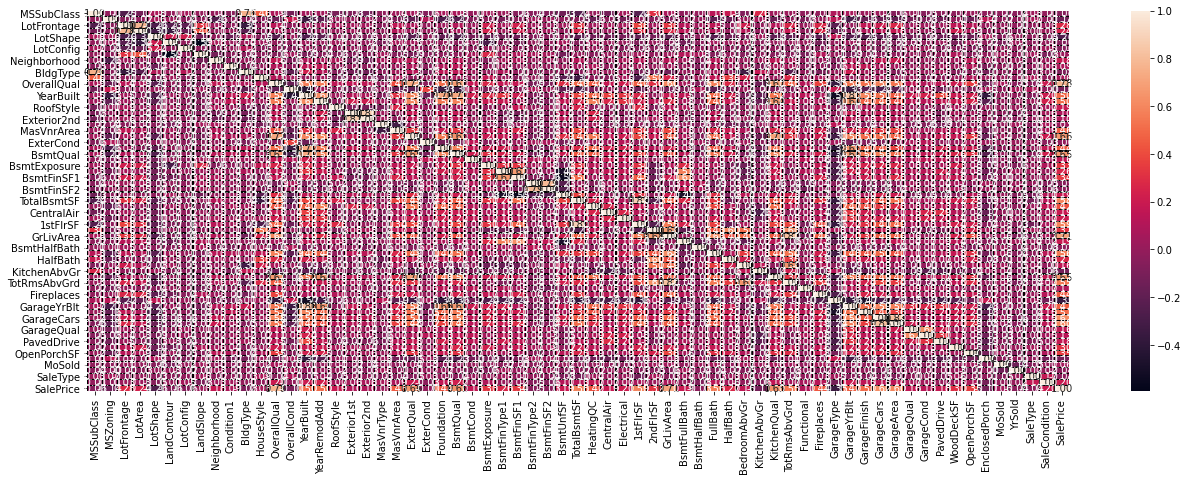

In [825]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [826]:
df.corr().columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePri

In [827]:
colname=[]
colname_2=[]
correlation=[]
for i in range(len(df.corr().columns)):
    for j in range(i):
        if abs(df.corr().iloc[i,j])>0.68:
            colname.append(df.corr().columns[i]),
            colname_2.append(df.corr().columns[j]),
            correlation.append(df.corr().iloc[i,j])


In [828]:
correlation_house = pd.DataFrame()
correlation_house['Column 1'] = colname
correlation_house['Column 2'] = colname_2
correlation_house['Correlation'] = correlation
correlation_house

,Column 1,Column 2,Correlation
0,LotArea,LotFrontage,0.780968
1,BldgType,MSSubClass,0.759657
2,Exterior2nd,Exterior1st,0.867316
3,ExterQual,OverallQual,0.722725
4,Foundation,YearBuilt,0.723491
5,BsmtQual,YearBuilt,0.721840
6,BsmtFinSF2,BsmtFinType2,0.794346
7,1stFlrSF,TotalBsmtSF,0.887285
8,GrLivArea,2ndFlrSF,0.684365
9,KitchenQual,ExterQual,0.695937


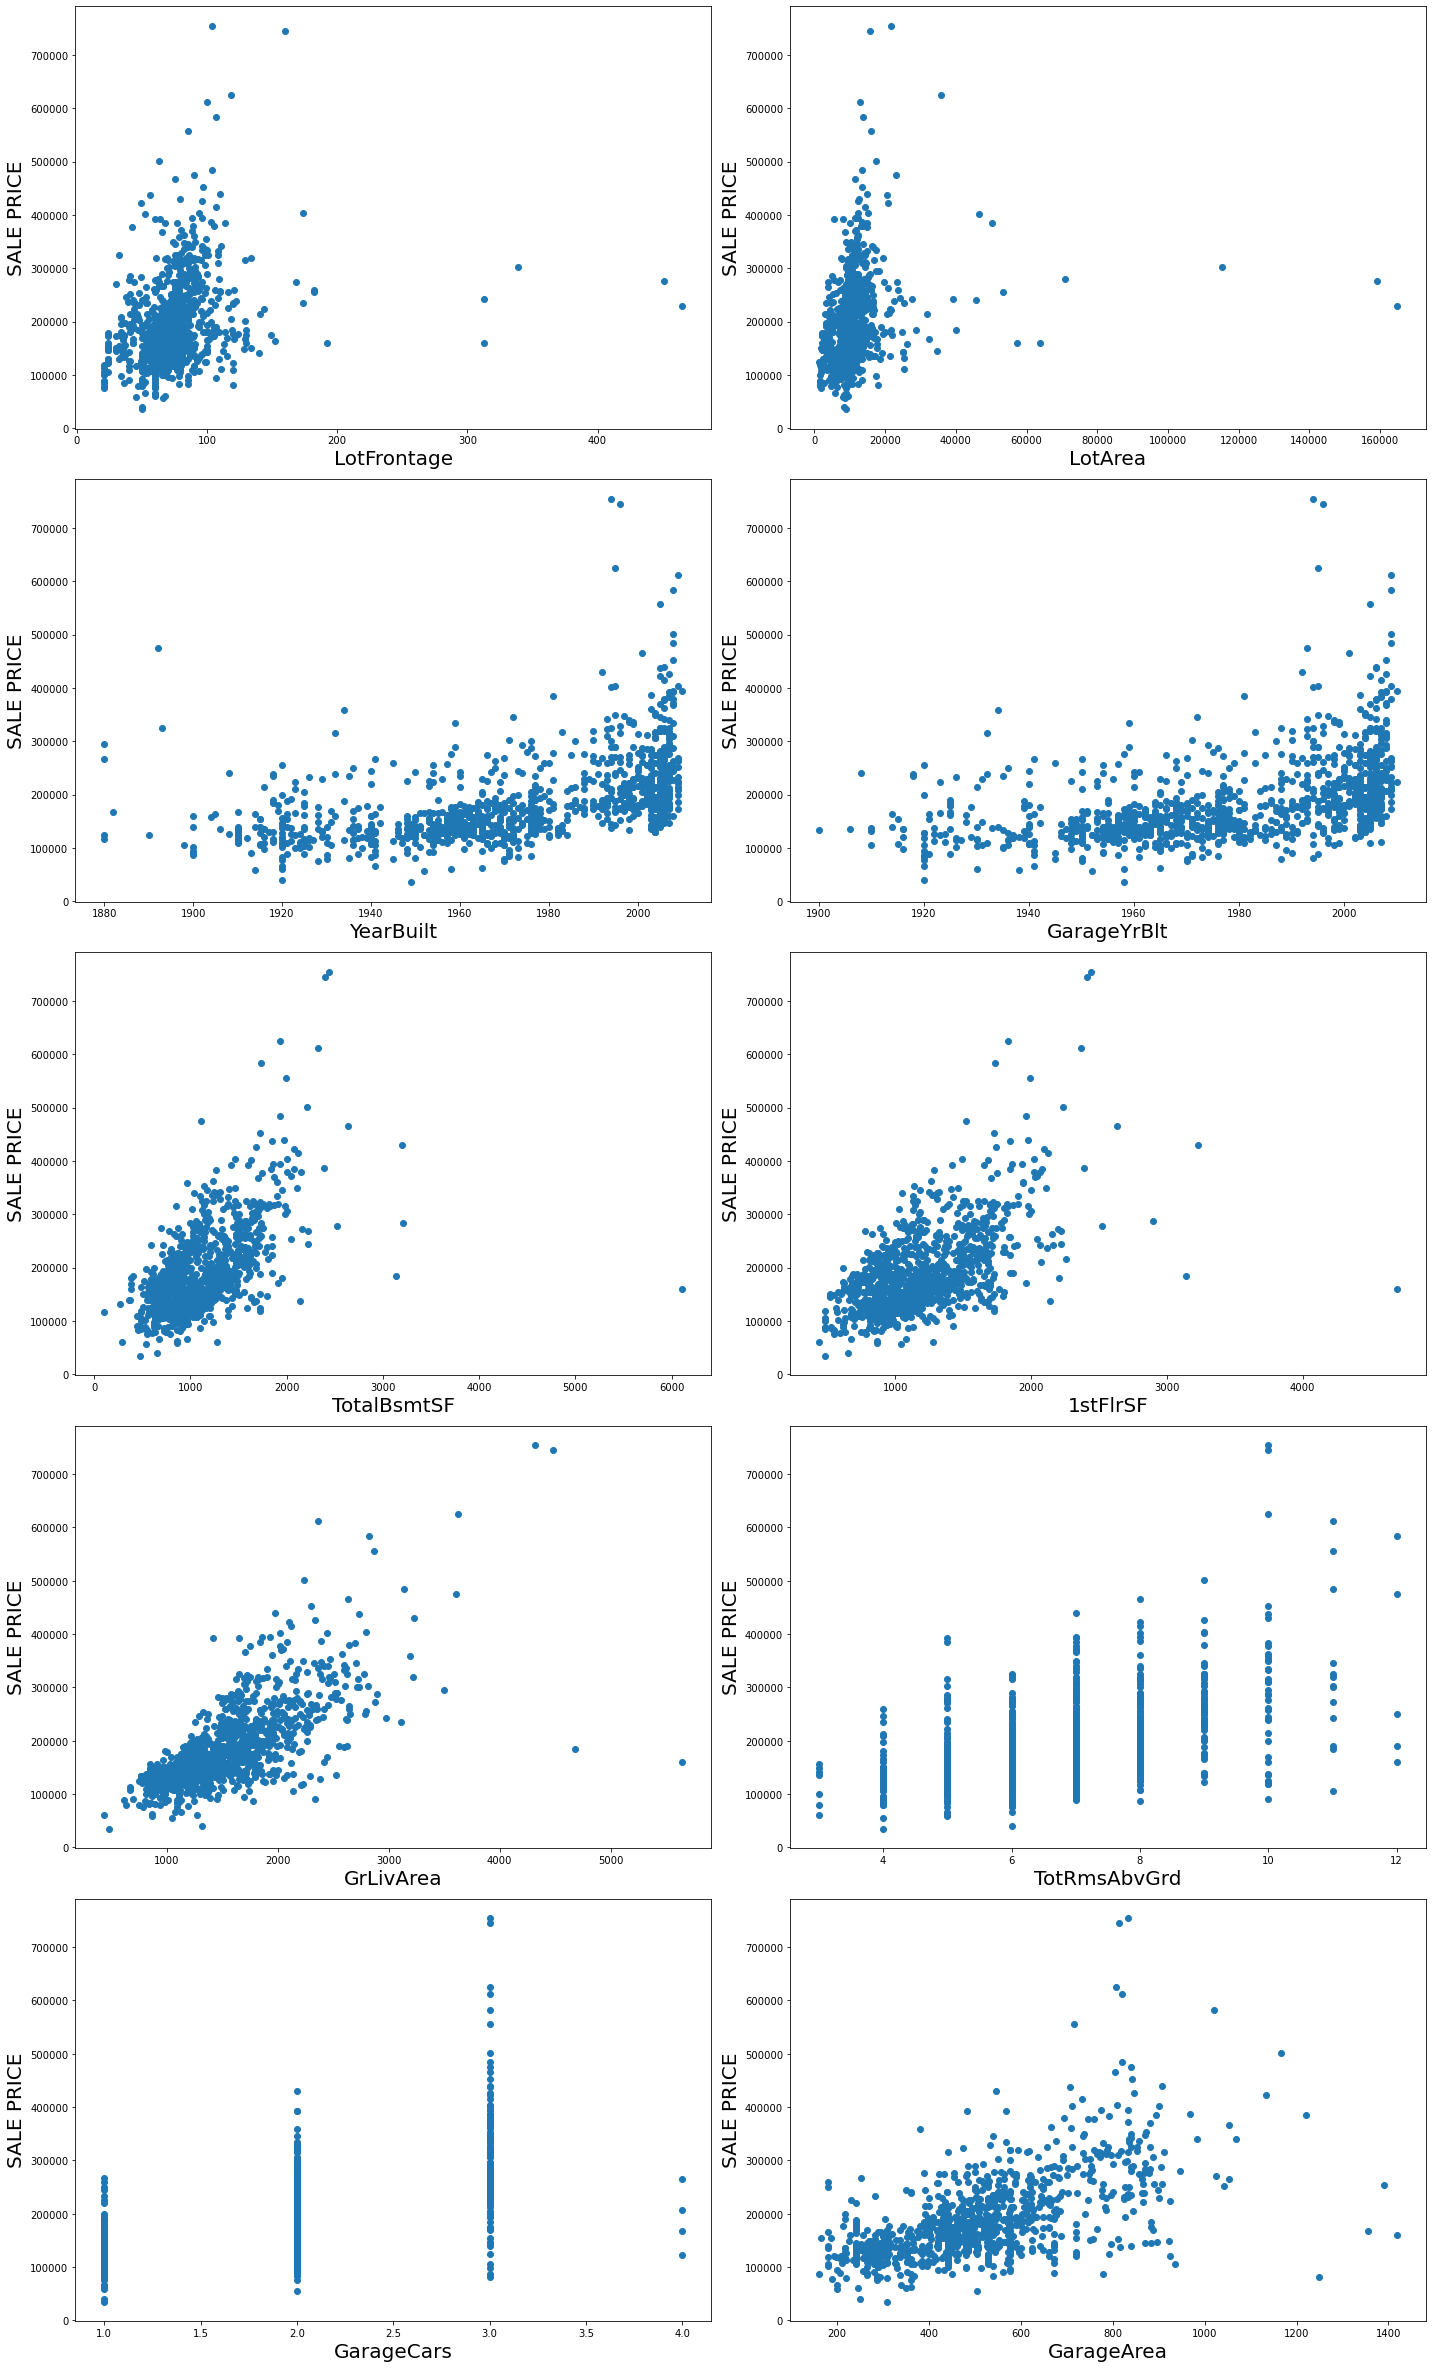

In [829]:
#Visualizing relatinship between feature (continuous) and label (SCATTER PLOT)
features = ['LotFrontage', 'LotArea','YearBuilt','GarageYrBlt','TotalBsmtSF','1stFlrSF','GrLivArea','TotRmsAbvGrd','GarageCars','GarageArea']
plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in features:
	if plotnumber<=30: 
		ax=plt.subplot(5,2,plotnumber)
		plt.scatter(df[column],df['SalePrice'])
		plt.xlabel(column,fontsize=20)
		plt.ylabel('SALE PRICE', fontsize=20)
	plotnumber+=1
plt.tight_layout()

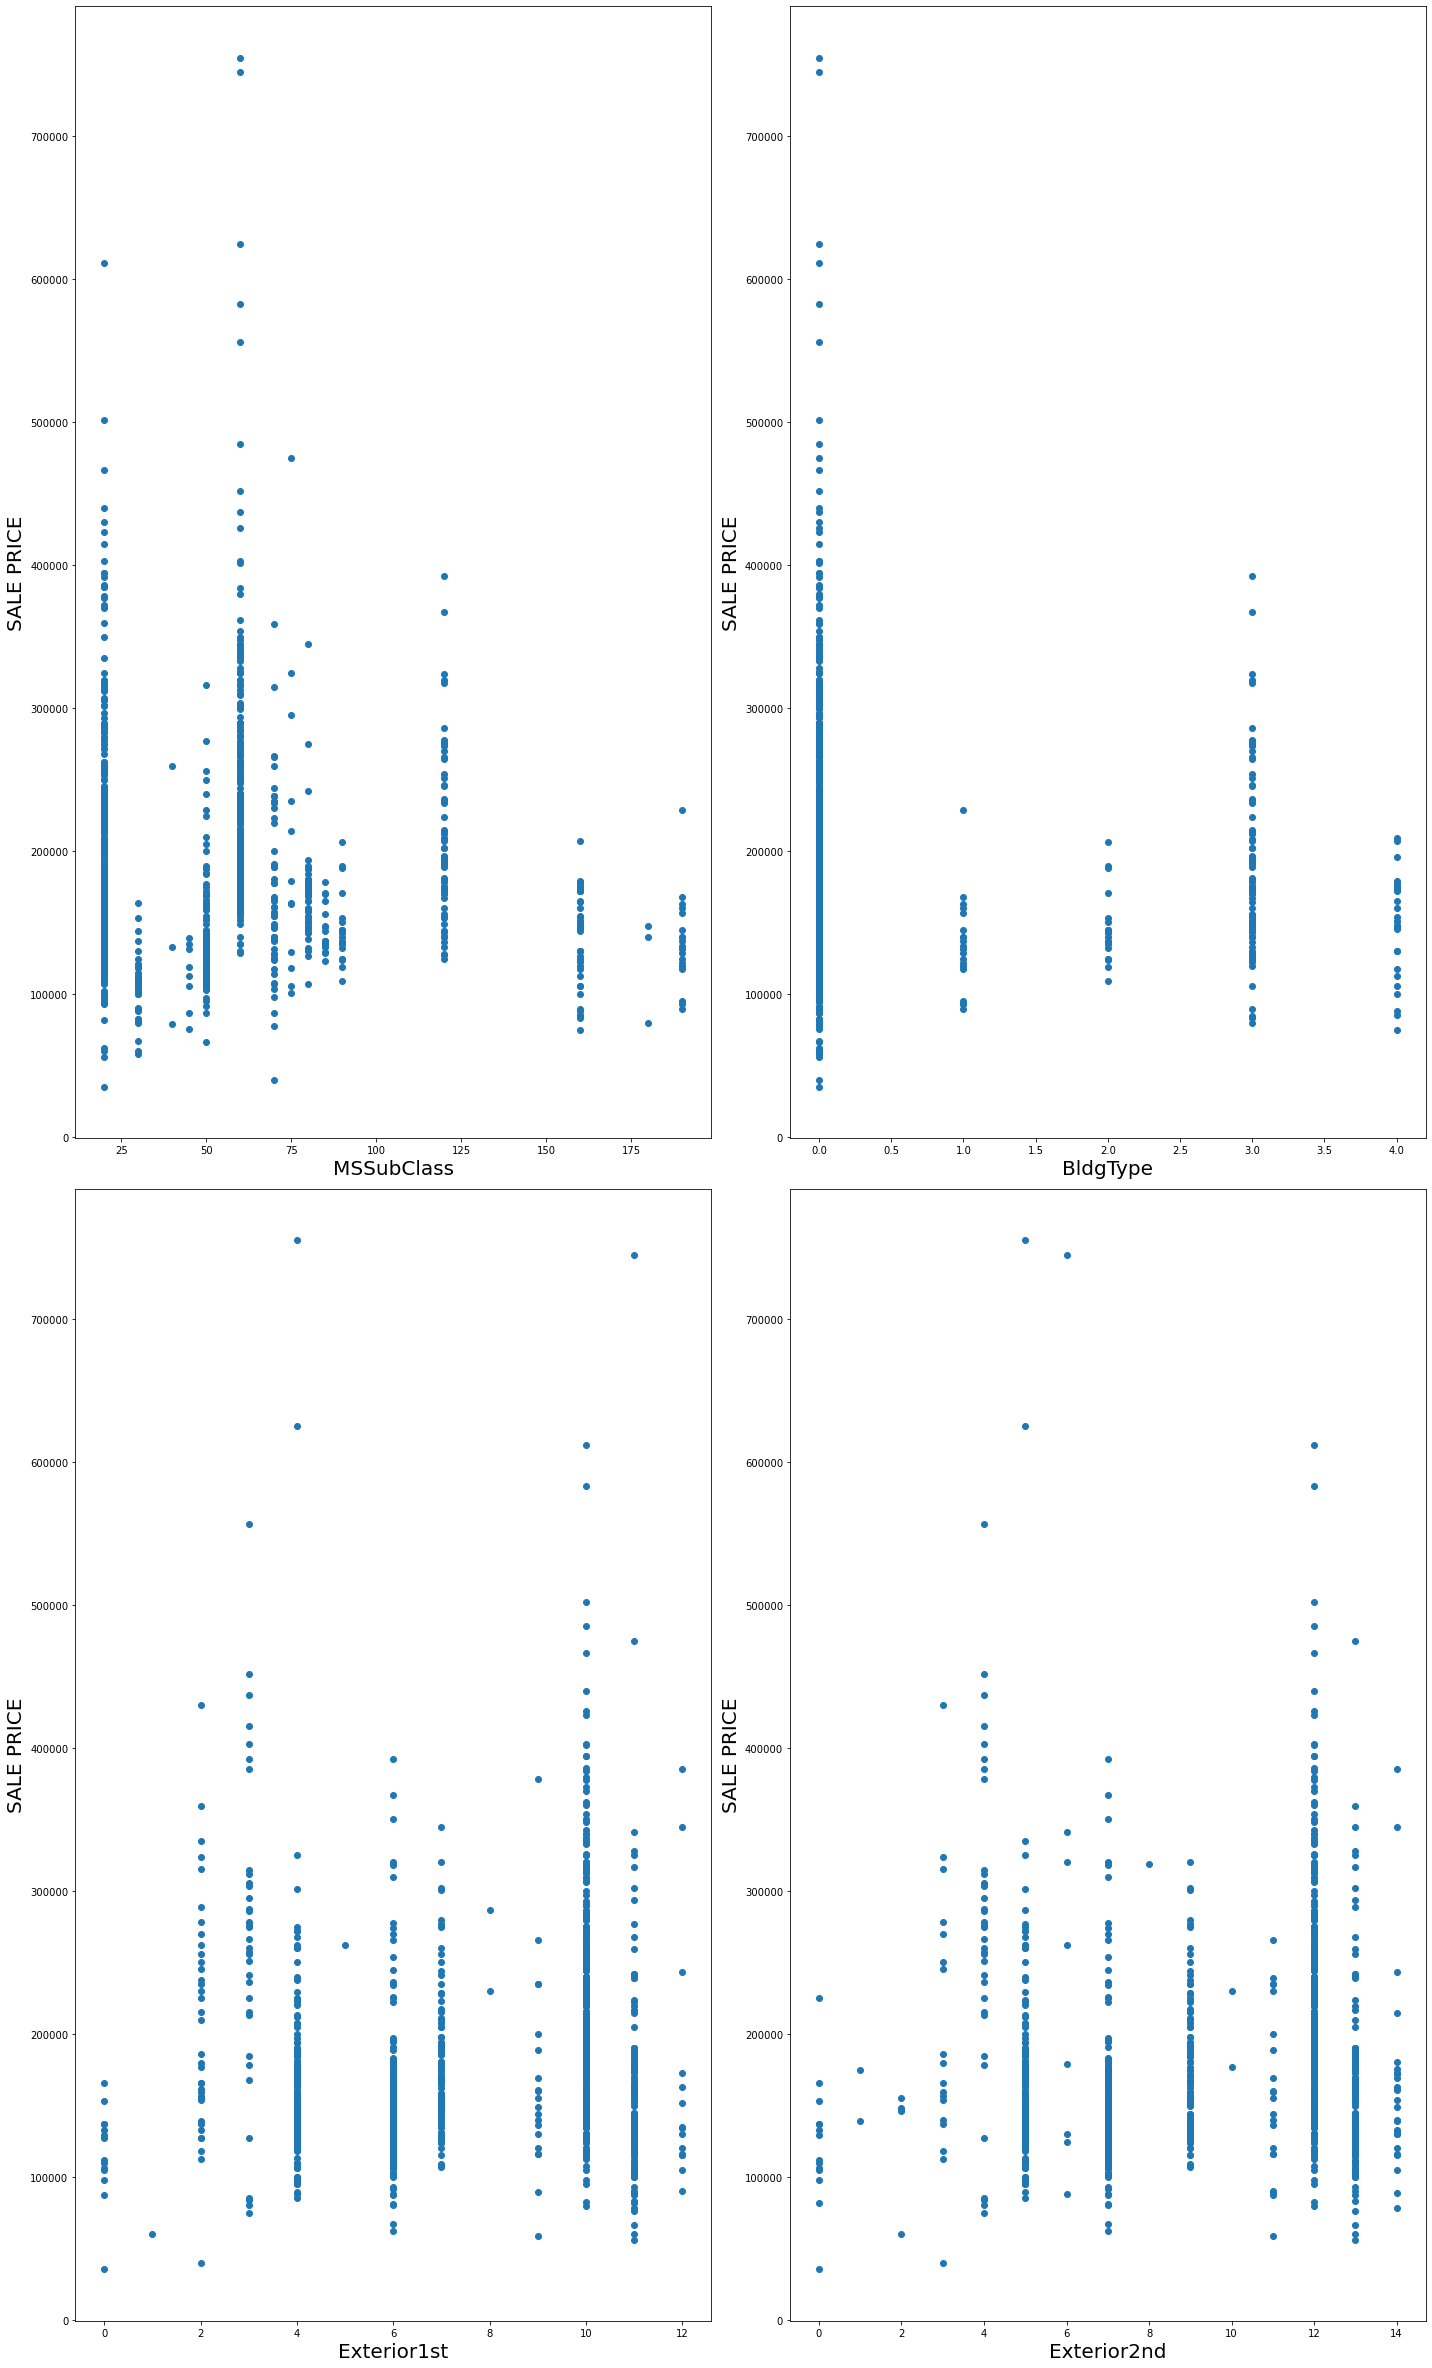

In [830]:
#Visualizing relatinship between feature (categorical) and label (SCATTER PLOT)
features = ['MSSubClass','BldgType','Exterior1st','Exterior2nd']
plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in features:
	if plotnumber<=30: 
		ax=plt.subplot(2,2,plotnumber)
		plt.scatter(df[column],df['SalePrice'])
		plt.xlabel(column,fontsize=20)
		plt.ylabel('SALE PRICE', fontsize=20)
	plotnumber+=1
plt.tight_layout()

In [831]:
#FEATURE SELECTION
X=df.drop(columns=['SalePrice'])
y=df['SalePrice']
#Using SelectKBest feature seleciton Method
from sklearn.feature_selection import SelectKBest,f_classif
best_features=SelectKBest(f_classif, k=64)
fit=best_features.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)
#concatenate dataframes
feature_scores = pd.concat([df_columns,df_scores],axis=1)
#name output columns
feature_scores.columns = ['Feaure_Name','Score']
#print 64 best features
top_features = feature_scores.nlargest(64,'Score')
print(feature_scores.nlargest(64,'Score'))

      Feaure_Name     Score
12    OverallQual  4.747910
21      ExterQual  3.259307
38      GrLivArea  2.954923
24       BsmtQual  2.847734
52     GarageCars  2.643168
..            ...       ...
11     HouseStyle  0.796082
56     PavedDrive  0.730775
44   KitchenAbvGr  0.710888
59  EnclosedPorch  0.703625
47     Functional  0.637621

[64 rows x 2 columns]


In [832]:
top_features[:60]

,Feaure_Name,Score
12,OverallQual,4.747910
21,ExterQual,3.259307
38,GrLivArea,2.954923
24,BsmtQual,2.847734
52,GarageCars,2.643168
45,KitchenQual,2.626759
53,GarageArea,2.433871
41,FullBath,2.376510
14,YearBuilt,2.051761
51,GarageFinish,2.027534


In [833]:
columns_drop=['LotFrontage','GarageYrBlt','TotalBsmtSF','TotRmsAbvGrd','GarageArea','BsmtFinType2','MSSubClass','Exterior2nd']

In [834]:
df.drop(columns=columns_drop,inplace=True)

In [835]:
df.shape

(1073, 57)

In [836]:
cont_columns = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']

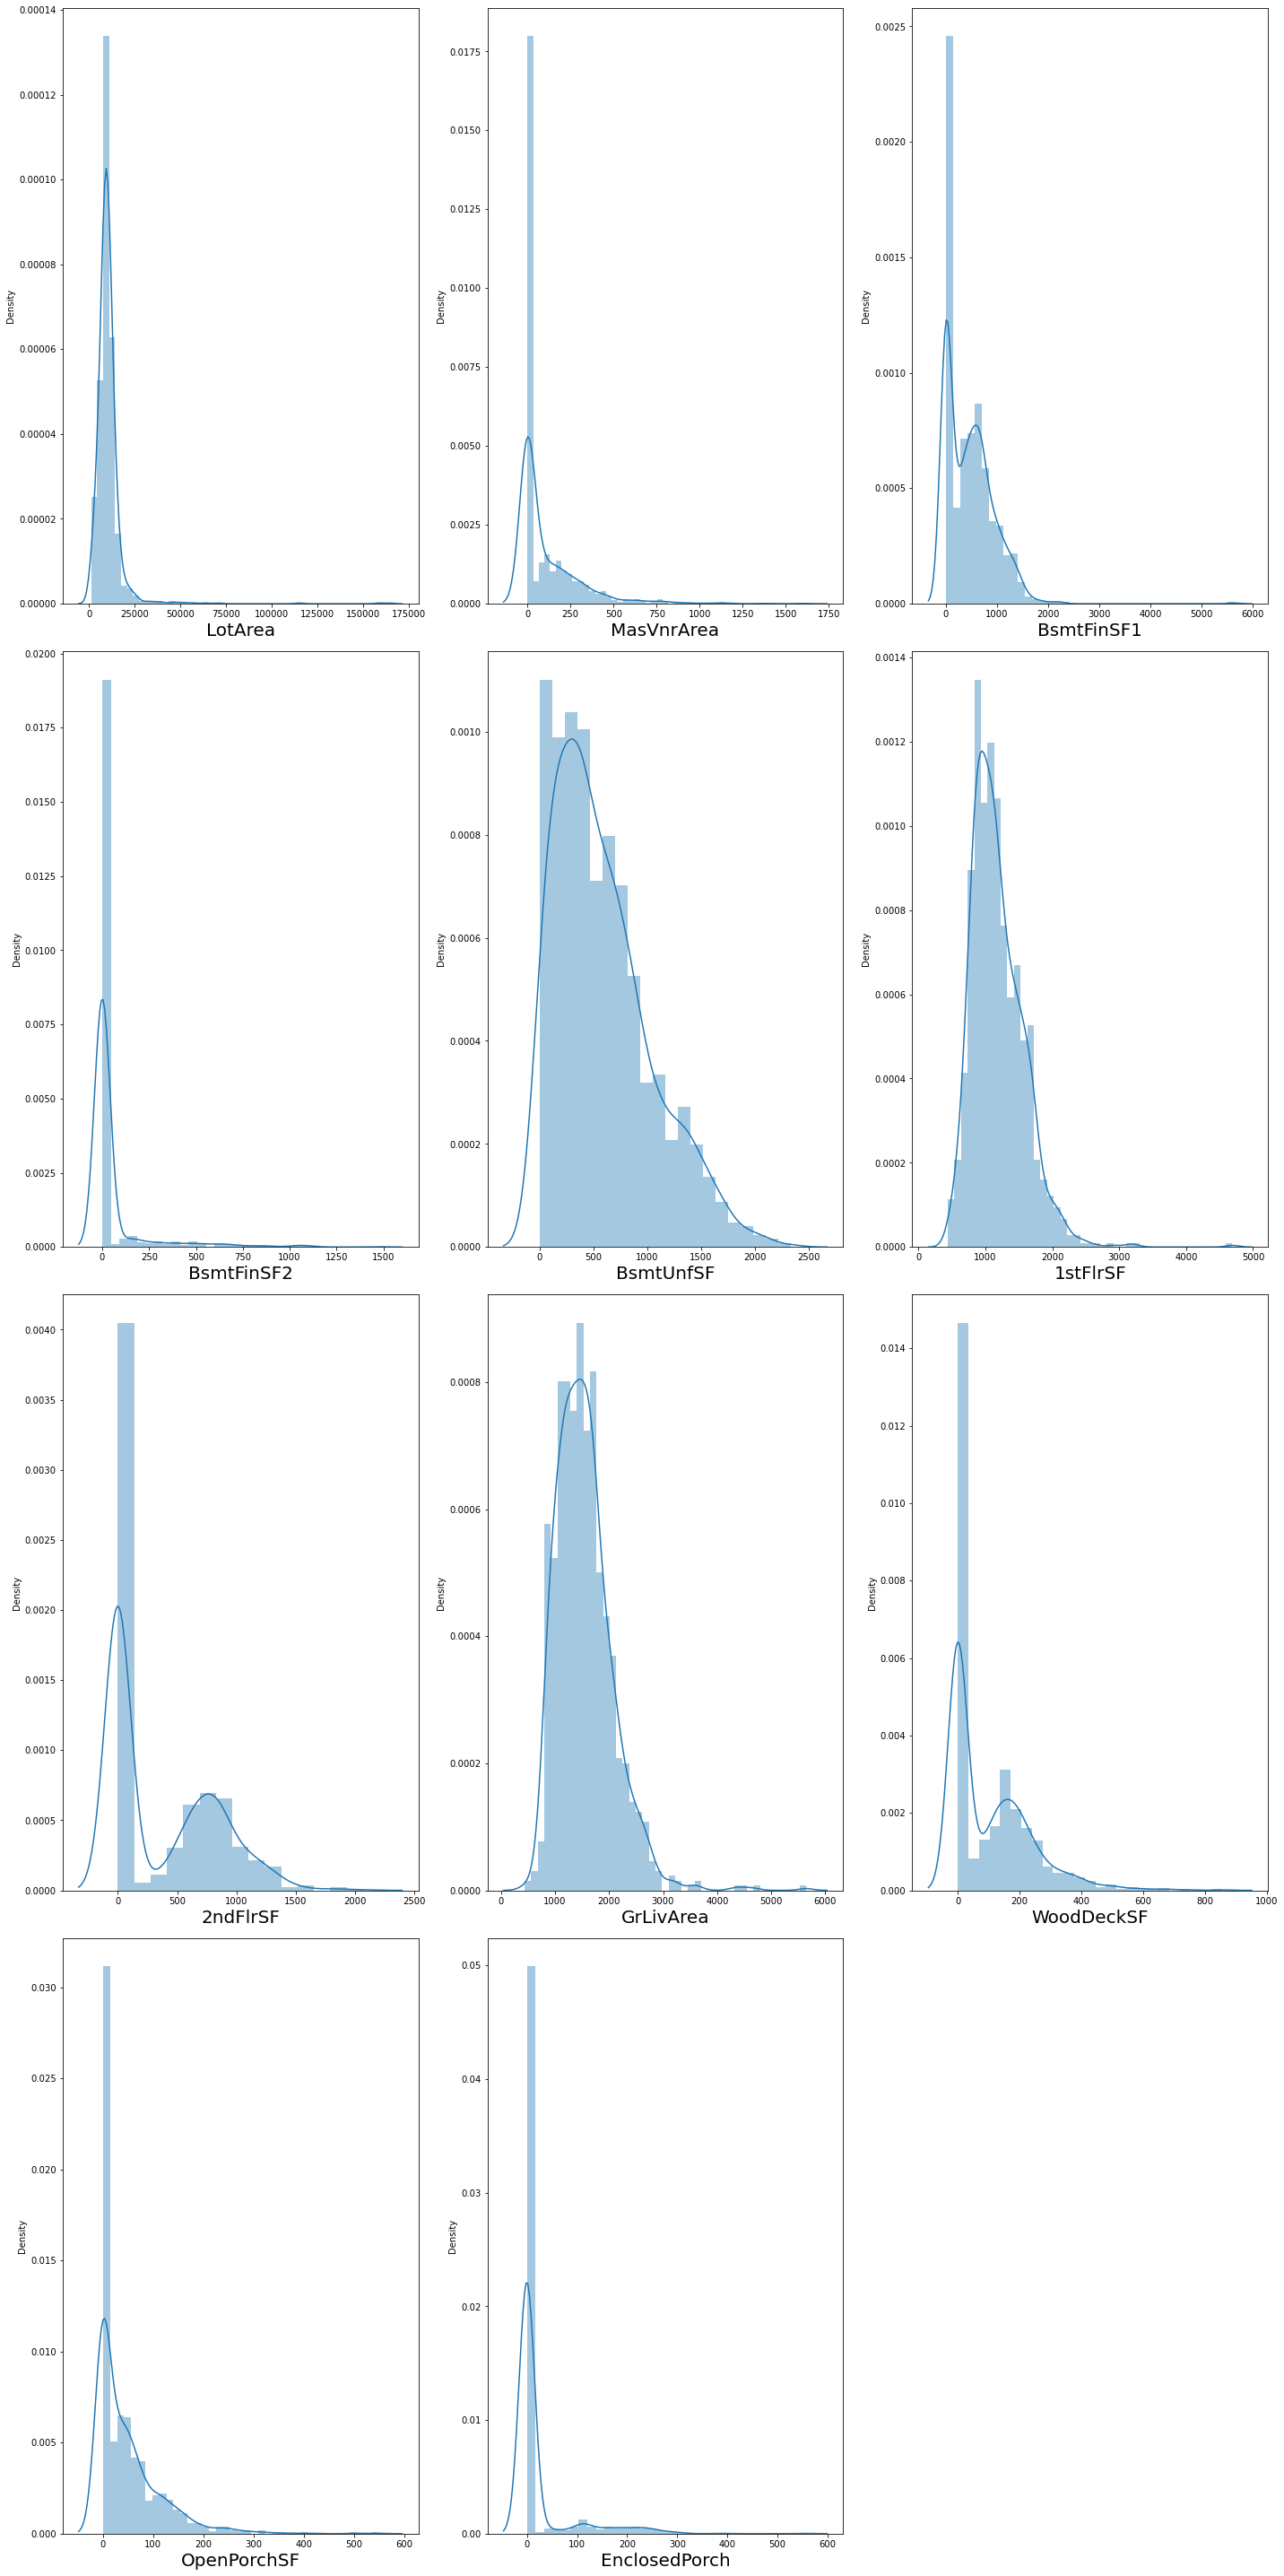

In [837]:
#Visualise the distribution of data in the continous feature columns(DISTRIBUTION PLOT)

plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in df[cont_columns]:
    if plotnumber<=30:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [838]:
#LotArea = High values of 0,right skewed
#MasVnrArea = High values of 0, righ skewed
#BsmtFinSF1 = High values of 0, right skewed
#BsmtFinSF2 = Very high values of 0, right skewed
#BsmtUnfSF = Slightly skewed
#1stFlrSF = Slightly Skewed
#2ndFlrSF = Very high values of 0, right skewed
#GrLivArea = right skewed
#WoodDeckSF = Very high values of 0, right skewed
#OpenPorchSF = Very high values of 0, right skewed
#EnclosedProch = Very high values of 0, right skewed

#All of the above mentioned continuous features have high percentage of 0 values
#hence removing skewness in these columns will be difficult

In [839]:
#Checking skewness of the features
df[cont_columns].skew().sort_values(ascending=False)

LotArea          10.487467
BsmtFinSF2        4.194615
EnclosedPorch     3.173403
MasVnrArea        2.741196
OpenPorchSF       2.279292
BsmtFinSF1        1.896087
1stFlrSF          1.548317
GrLivArea         1.523000
WoodDeckSF        1.457280
BsmtUnfSF         0.912966
2ndFlrSF          0.773012
dtype: float64

In [840]:
#LoArea has very high value of skewness
#BsmfFinSF2, EnclosedProch, MasVnrArea, OpenPorchSF, BsmtFinsF1, 1stFlrSF, GrLivArea, WoodDeckSF too have high skewness

In [841]:
df_cont = df[cont_columns]

In [842]:
#We can see skewness in few of our columns, we will remove the skewness using power_transform function
from sklearn.preprocessing import power_transform
df_cont_new = power_transform(df_cont)
df_cont=pd.DataFrame(df_cont_new,columns=df_cont.columns)
df_cont.skew().sort_values(ascending=False) #validating that the skewness is removed

BsmtFinSF2       2.272586
EnclosedPorch    2.091618
MasVnrArea       0.342459
2ndFlrSF         0.238574
WoodDeckSF       0.046709
LotArea          0.017153
1stFlrSF        -0.001877
GrLivArea       -0.002211
OpenPorchSF     -0.056293
BsmtUnfSF       -0.199883
BsmtFinSF1      -0.453465
dtype: float64

In [843]:
#BsmtFinsSF2, EnclosedPorch have skewness left only
#rest all the features do not have skewness left in them

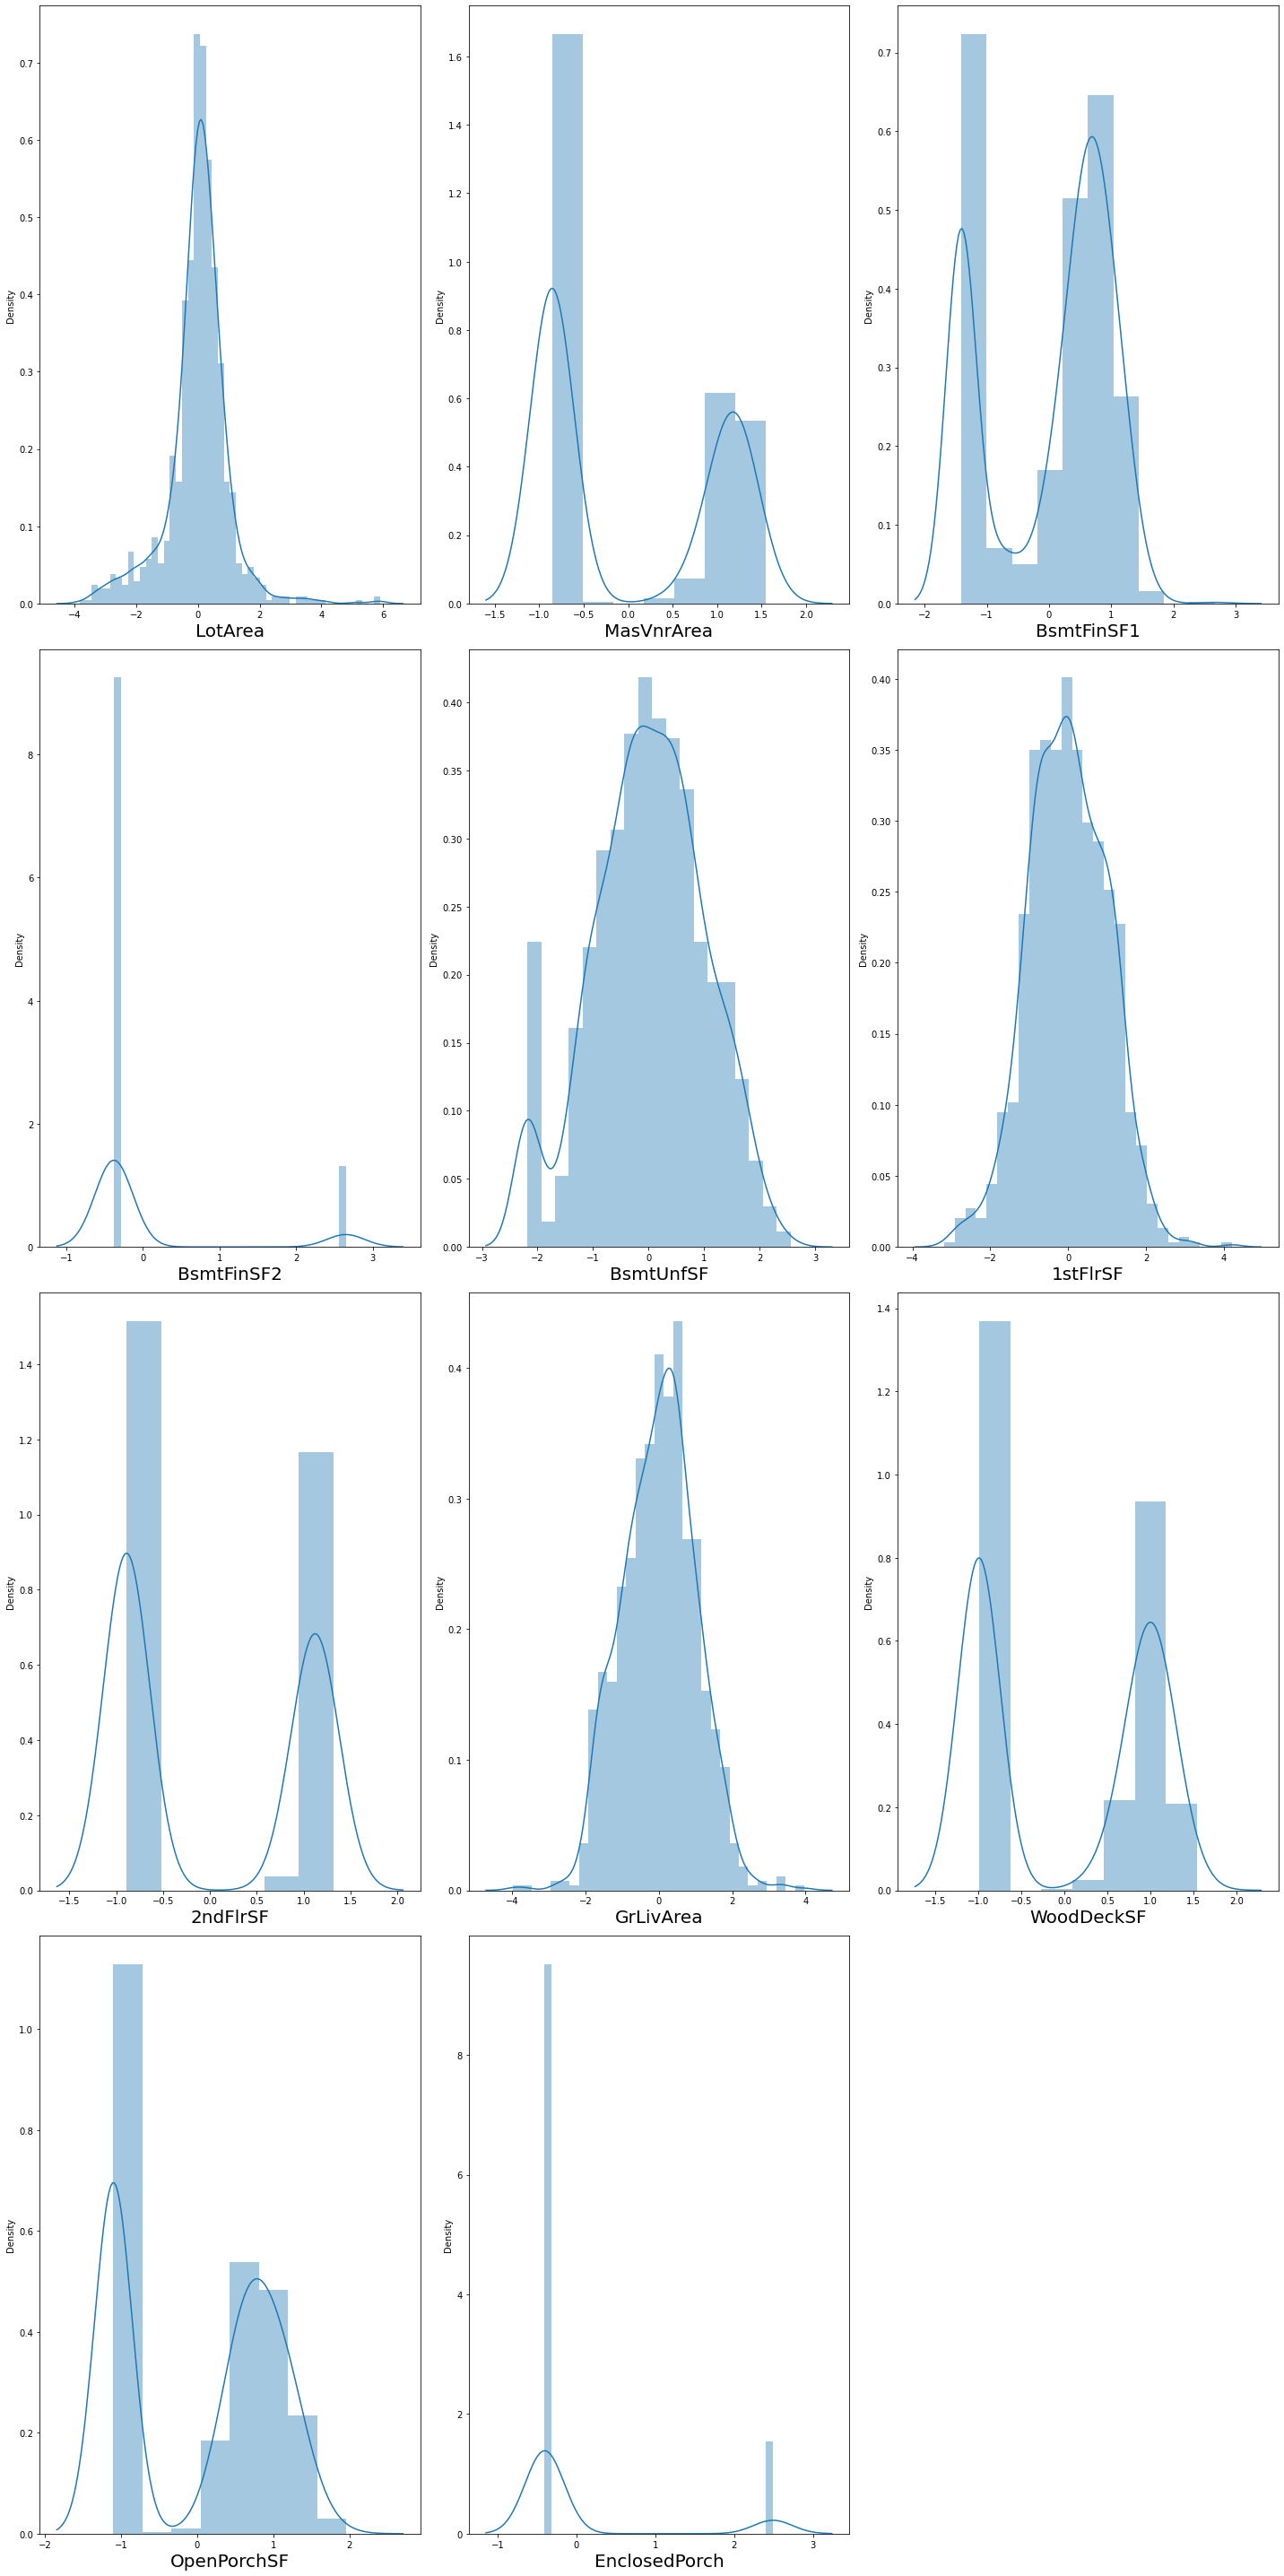

In [844]:
#Visualise the distribution of data in the continous feature columns(DISTRIBUTION PLOT)

plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in df_cont:
    if plotnumber<=30:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df_cont[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [845]:
df[cont_columns] = df_cont

In [846]:
df[cont_columns]

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,WoodDeckSF,OpenPorchSF,EnclosedPorch
0,-1.255626,-0.855876,-0.220721,-0.377763,0.886015,-0.502896,-0.890114,-1.346752,-0.995862,1.427138,-0.401566
1,1.070097,-0.855876,0.315515,2.649277,1.016798,2.105188,-0.890114,1.276081,0.714081,1.432301,-0.401566
2,0.129068,-0.855876,0.897097,-0.377763,-0.597027,0.023485,1.151915,0.984201,0.999707,1.187731,-0.401566
3,0.467440,1.353711,0.754786,-0.377763,1.157916,1.555593,-0.890114,0.716867,-0.995862,1.154791,-0.401566
4,1.165600,1.075065,1.178171,-0.377763,-0.305758,1.127332,-0.890114,0.283589,1.101447,-1.103231,-0.401566
...,...,...,...,...,...,...,...,...,...,...,...
1068,-0.246960,-0.855876,0.022928,-0.377763,0.372849,-0.843034,-0.890114,-1.683273,-0.995862,-1.103231,2.489767
1069,0.108664,0.698101,0.462863,-0.377763,-0.114512,-0.708068,-0.890114,-1.549888,-0.995862,-1.103231,-0.401566
1070,-2.757249,-0.855876,0.607691,-0.377763,-0.493130,-0.877765,1.071204,-0.013820,0.739812,-1.103231,-0.401566
1071,-0.178477,-0.855876,-1.410893,-0.377763,0.349772,-1.808390,1.093514,-0.328824,-0.995862,0.742193,2.491958


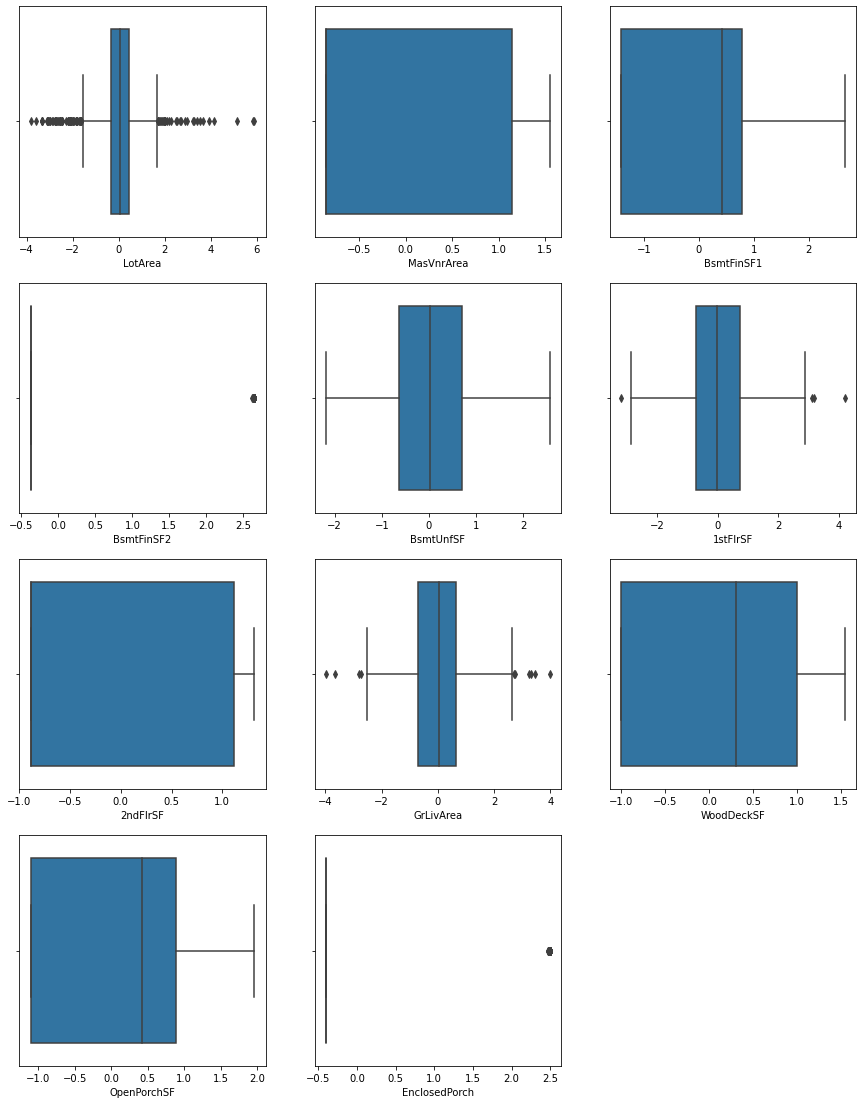

In [847]:
#Visualizing the outliers using BOXPLOT

plt.figure(figsize=(15,50))
graph=1

for column in df[cont_columns]:
	if graph<=30: 
		ax=plt.subplot(10,3,graph)
		sns.boxplot(df[column],orient='v')
		plt.xlabel(column,fontsize=10)
	graph+=1
plt.show()

In [848]:
#LotArea has a lot of outliers in it, but because this feature describes the lot size in square feet 
#there would be many houses with different lot sizes and hence we should not drop that data. 
#That is why, we will move ahead with our modellig

In [849]:
X=df.drop(columns=['SalePrice'])
y=df['SalePrice']

In [850]:
#Data Scaling
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [851]:
#Importing the test dataset
df_test = pd.read_csv(r'test_house.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [852]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [853]:
#The test dataset does not have the SalePrice target in it, hence we will train & test on our training dataset 
#Once after we finalise the best fit model, we will use that model to predict the SalePrice for the test dataset.

In [854]:
#Finding best random_state
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
maxAccu=0 #maximum accuracy
maxRS=0 #best random state value for which max accuracy is acheived 
for i in range(0,100):
	x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=i)
	lr.fit(x_train,y_train)
	y_pred=lr.predict(x_test)
	acc = r2_score(y_test,y_pred)
	if acc>maxAccu:
		maxAccu=acc
		maxRS=i
print("Best accuracy is", maxAccu,"on Random State", maxRS)

Best accuracy is 0.8705865259736777 on Random State 3


In [855]:
#Train Test Split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=3)

In [856]:
model_name=[]
r2_scores=[]
rmse_value=[]
cvs=[]

R2Score : 83.26743877122628
MAE: 21562.02620551029
MSE: 1137641909.7416432
RMSE: 33728.94765244897


Text(0, 0.5, 'Predicted Y')

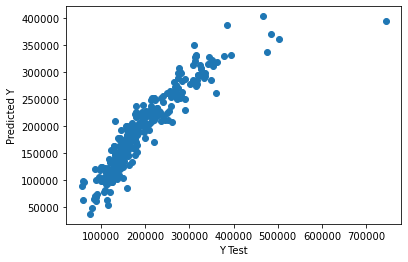

In [857]:
#Linear Regression
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
print("R2Score :",r2score)
scr = cross_val_score(lr,X,y,cv=5)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
model_name.append('Linear Regression')
r2_scores.append(r2score)
rmse_value.append(rmse)
cvs.append(scr.mean())
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

R2Score: 60.50504061655463
MAE: 31188.14596273292
MSE: 2685250656.121118
RMSE: 51819.40424320911


Text(0, 0.5, 'Predicted Y')

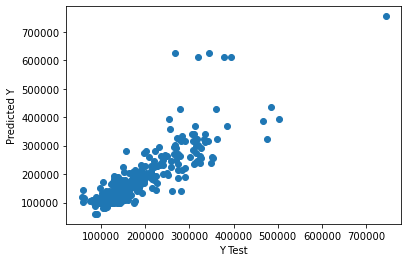

In [858]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
scr2 = cross_val_score(dtr,X,y,cv=5)
print("R2Score:", r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
model_name.append('Decision Tree Regressor')
r2_scores.append(r2score)
rmse_value.append(rmse)
cvs.append(scr2.mean())
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

R2Score:  89.67972643266842
MAE: 16993.891304347828
MSE: 701672360.2364938
RMSE: 26489.098894384722


Text(0, 0.5, 'Predicted Y')

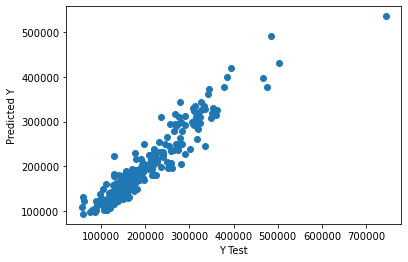

In [859]:
#RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
y_pred=rdr.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
scr3 = cross_val_score(rdr,X,y,cv=5)
print("R2Score: ", r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
model_name.append('Random Forest Regressor')
r2_scores.append(r2score)
rmse_value.append(rmse)
cvs.append(scr3.mean())
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

R2 Score:  81.3534023870281
MAE: 26995.965413792863
MSE: 1267776679.7665539
RMSE: 35605.85176296944


Text(0, 0.5, 'Predicted Y')

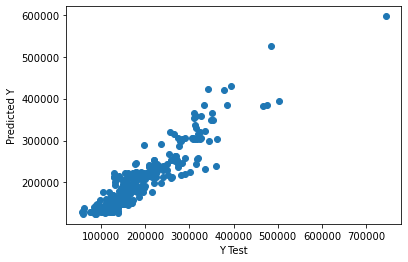

In [860]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
print("R2 Score: ", r2score)
scr5 = cross_val_score(ada,X,y,cv=5)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
model_name.append('ADA Boost')
r2_scores.append(r2score)
rmse_value.append(rmse)
cvs.append(scr5.mean())
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

R2 Score:  90.45408926008322
MAE: 16857.379294448758
MSE: 649023659.6718593
RMSE: 25475.942763161078


Text(0, 0.5, 'Predicted Y')

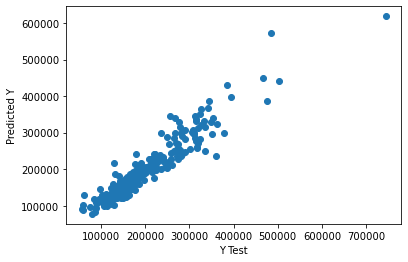

In [861]:
#XGB
import xgboost as xgb
xgb = xgb.XGBRegressor()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
print("R2 Score: ",r2score)
scr6 = cross_val_score(xgb,X,y,cv=5)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
model_name.append('XGBoost')
r2_scores.append(r2score)
rmse_value.append(rmse)
cvs.append(scr6.mean())
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [862]:
import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value
Regression_Scores['Cross Val Score']=cvs
Regression_Scores

,Model Name,r2 Score,RMSE,Cross Val Score
0,Linear Regression,83.267439,33728.947652,0.783417
1,Decision Tree Regressor,60.505041,51819.404243,0.720655
2,Random Forest Regressor,89.679726,26489.098894,0.838131
3,ADA Boost,81.353402,35605.851763,0.785783
4,XGBoost,90.454089,25475.942763,0.832870


,Y Test,Y Pred
210,157000,159527.54
197,137000,126954.83
678,178900,180055.25
798,123500,128750.38
512,88000,102453.26


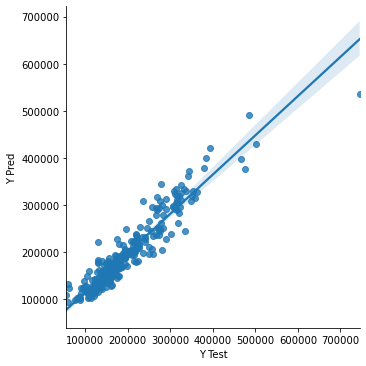

In [863]:
y_pred=rdr.predict(x_test)
data = pd.DataFrame({'Y Test':y_test , 'Y Pred':y_pred},columns=['Y Test','Y Pred'])
sns.lmplot(x='Y Test',y='Y Pred',data=data,palette='rainbow')
data.head()

# HYPERPARAMETER TUNING

# RANDOM FOREST REGRESSOR

In [864]:
parameters = {'criterion':['mse','mae'], 'max_features':["auto","sqrt","log2"]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [865]:
rf = RandomForestRegressor(criterion="mae",max_features="sqrt")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9740858295458305

In [866]:
y_pred=rf.predict(x_test)
rfs = r2_score(y_test,y_pred)
print("r2_score:",rfs*100)
rfscore = cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print("Cross val score:",rfc*100)

r2_score: 86.67362420217691
Cross val score: 83.95052370523904


In [867]:
#The RandomForest Regressor has now been tuned and ready to use over the test dataset

# TEST DATASET

In [868]:
#Let us now treat the test dataset with the same steps as done over the training dataset

In [869]:
#Importing the test dataset
df_test = pd.read_csv(r'test_house.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [870]:
df_test.shape

(292, 80)

In [871]:
#Let us check the null values in the test dataset

In [872]:
test_null=df_test.isnull().sum().sort_values(ascending=False)

In [873]:
test_null[:20]

PoolQC          292
MiscFeature     282
Alley           278
Fence           248
FireplaceQu     139
LotFrontage      45
GarageType       17
GarageYrBlt      17
GarageQual       17
GarageCond       17
GarageFinish     17
BsmtCond          7
BsmtFinType2      7
BsmtFinType1      7
BsmtQual          7
BsmtExposure      7
MasVnrArea        1
MasVnrType        1
Electrical        1
HalfBath          0
dtype: int64

In [874]:
#We will treat the null values after we drop the unnecessary columns

# 1. Drop Unnecessary Features

In [875]:
#1 Drop Unnecessary Features
drop_columns= ['Id','LowQualFinSF','3SsnPorch','ScreenPorch','PoolArea','MiscVal','PoolQC','Fence','MiscFeature','Heating','RoofMatl','Condition2','Utilities','Street','Alley','FireplaceQu']
df_test.drop(columns = drop_columns,inplace=True)

In [876]:
df_test.shape

(292, 64)

# TREATING NULL VALUES

In [877]:
test_null=df_test.isnull().sum().sort_values(ascending=False)

In [878]:
test_null[:20]

LotFrontage     45
GarageQual      17
GarageType      17
GarageYrBlt     17
GarageCond      17
GarageFinish    17
BsmtExposure     7
BsmtQual         7
BsmtCond         7
BsmtFinType2     7
BsmtFinType1     7
MasVnrArea       1
MasVnrType       1
Electrical       1
KitchenQual      0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
dtype: int64

In [879]:
#As we can see from above all the features related to Garage have 17 null values each
#Hence, lets check whether all these null values fall in the dataset at the same time for each feature

In [880]:
df_test[df_test['GarageCond'].isnull() & df_test['GarageType'].isnull() & df_test['GarageYrBlt'].isnull() & df_test['GarageFinish'].isnull() & df_test['GarageQual'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition
5,180,RM,21.0,1936,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,NaN,NaN,Y,0,0,0,12,2007,WD,Normal
16,20,RL,NaN,8780,IR1,Lvl,Corner,Gtl,Mitchel,Norm,...,NaN,NaN,Y,0,0,0,3,2009,WD,Normal
23,190,RM,70.0,5600,Reg,Lvl,Inside,Gtl,IDOTRR,Norm,...,NaN,NaN,N,0,0,0,7,2010,WD,Normal
123,90,RL,60.0,9000,Reg,Lvl,FR2,Gtl,NAmes,Norm,...,NaN,NaN,Y,32,45,0,9,2009,WD,Normal
129,190,RM,33.0,4456,Reg,Lvl,Inside,Gtl,OldTown,Norm,...,NaN,NaN,N,0,0,102,6,2009,New,Partial
154,20,RL,50.0,9405,Reg,Lvl,Inside,Gtl,Edwards,Norm,...,NaN,NaN,Y,0,200,0,6,2009,WD,Normal
157,50,RL,138.0,18030,IR1,Bnk,Inside,Gtl,ClearCr,Norm,...,NaN,NaN,Y,122,0,0,3,2007,WD,Normal
164,50,RM,60.0,5586,IR1,Bnk,Inside,Gtl,OldTown,Feedr,...,NaN,NaN,N,0,98,0,9,2008,ConLD,Abnorml
187,45,RM,55.0,4388,IR1,Bnk,Inside,Gtl,OldTown,Feedr,...,NaN,NaN,N,0,0,0,6,2007,WD,Normal
193,30,RL,58.0,9098,IR1,Lvl,Inside,Gtl,Edwards,Norm,...,NaN,NaN,N,0,0,144,7,2007,WD,Normal


In [881]:
#Yes, all the null values fall in all the garage related columns at the same time and hence we shall drop all of them together

In [882]:
df_test.drop(df_test.index[df_test['GarageCond'].isnull() & df_test['GarageType'].isnull() & df_test['GarageYrBlt'].isnull() & df_test['GarageFinish'].isnull() & df_test['GarageQual'].isnull()], inplace=True)

In [883]:
test_null=df_test.isnull().sum().sort_values(ascending=False)
test_null[:10]

LotFrontage     44
BsmtFinType2     6
BsmtQual         6
BsmtCond         6
BsmtExposure     6
BsmtFinType1     6
Electrical       1
MasVnrType       1
MasVnrArea       1
HalfBath         0
dtype: int64

In [884]:
##As we can see from above all the features related to Basement have 6 null values each
#Hence, lets check whether all these null values fall in the dataset at the same time for each feature

In [885]:
df_test[df_test['BsmtExposure'].isnull() & df_test['BsmtFinType2'].isnull() & df_test['BsmtQual'].isnull() & df_test['BsmtCond'].isnull() & df_test['BsmtFinType1'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition
30,90,RM,68.0,8930,Reg,Lvl,Inside,Gtl,Sawyer,RRAe,...,TA,TA,Y,0,0,0,4,2010,WD,Normal
119,20,RL,60.0,7200,Reg,Lvl,Inside,Gtl,NAmes,Norm,...,TA,TA,Y,0,27,0,7,2008,WD,Normal
128,20,RL,74.0,10206,Reg,Lvl,Corner,Gtl,Edwards,Norm,...,TA,Fa,Y,0,0,0,7,2009,WD,Normal
142,90,RL,60.0,8544,Reg,Lvl,Inside,Gtl,NAmes,Norm,...,TA,TA,Y,0,0,0,7,2006,WD,Normal
148,20,RM,70.0,12702,Reg,Lvl,Inside,Gtl,OldTown,Norm,...,TA,TA,Y,0,45,0,12,2008,WD,Normal
270,50,RL,80.0,17120,Reg,Lvl,Inside,Gtl,ClearCr,Feedr,...,TA,TA,N,0,59,0,7,2008,WD,Normal


In [886]:
#Yes, all the null values fall in all the Basement related columns at the same time and hence we shall drop all of them together

In [887]:
df_test.drop(df_test.index[df_test['BsmtExposure'].isnull() & df_test['BsmtFinType2'].isnull() & df_test['BsmtQual'].isnull() & df_test['BsmtCond'].isnull() & df_test['BsmtFinType1'].isnull()], inplace=True)

In [888]:
test_null=df_test.isnull().sum().sort_values(ascending=False)
test_null[:5]

LotFrontage    44
Electrical      1
MasVnrType      1
MasVnrArea      1
HalfBath        0
dtype: int64

In [889]:
#Lets check the same for Veneer Tpe or Veneer Area

In [890]:
df_test[df_test['MasVnrType'].isnull() & df_test['MasVnrArea'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition
31,20,RL,67.0,10083,Reg,Lvl,Inside,Gtl,SawyerW,Norm,...,TA,TA,Y,0,41,0,8,2009,WD,Normal


In [891]:
df_test.drop(df_test.index[df_test['MasVnrType'].isnull() & df_test['MasVnrArea'].isnull()], inplace=True)

In [892]:
test_null=df_test.isnull().sum().sort_values(ascending=False)
test_null[:3]

LotFrontage    44
Electrical      1
MSSubClass      0
dtype: int64

In [893]:
#IMPUTING NULL VALUES

In [894]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer = imputer.fit(df_test[['Electrical']])
df_test['Electrical'] = imputer.transform(df_test[['Electrical']])

In [895]:
test_null=df_test.isnull().sum().sort_values(ascending=False)
test_null[:2]

LotFrontage    44
MSSubClass      0
dtype: int64

In [896]:
df_test=df_test.reset_index()

In [897]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iter_impute = IterativeImputer()
ite_imp = pd.DataFrame(np.round(iter_impute.fit_transform(df_test[['LotFrontage','LotArea']])),columns=['LotFrontage','LotArea'])
df_test[['LotFrontage','LotArea']]=ite_imp

In [898]:
test_null=df_test.isnull().sum().sort_values(ascending=False)
test_null[:3]

index          0
TotalBsmtSF    0
CentralAir     0
dtype: int64

In [899]:
df_test.drop(columns='index',inplace=True)

In [900]:
#There are no null values present in the dataset, now we can go ahead with the encoding

# LABEL ENCODING

In [901]:
#Lets check the datatype of all the nominal variables

In [902]:
df_test[nominal_var].dtypes

MSZoning         object
LotConfig        object
Neighborhood     object
Condition1       object
RoofStyle        object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
Foundation       object
CentralAir       object
Electrical       object
GarageType       object
SaleType         object
SaleCondition    object
dtype: object

In [903]:
#Let us check the value counts of each variable which we are going to encode

In [904]:
for i in nominal_var:
    print("*******************************************************")
    print("Value counts of", i, "\n" )
    print("DataType:-",df_test[i].dtypes)
    print("Null Values:-",df_test[i].isnull().sum())
    try:
        print("Range:-",df_test[i].min(),"TO",df_test[i].max())
    except:
        pass
    print('*******************************************************')

*******************************************************
Value counts of MSZoning 

DataType:- object
Null Values:- 0
Range:- C (all) TO RM
*******************************************************
*******************************************************
Value counts of LotConfig 

DataType:- object
Null Values:- 0
Range:- Corner TO Inside
*******************************************************
*******************************************************
Value counts of Neighborhood 

DataType:- object
Null Values:- 0
Range:- Blmngtn TO Veenker
*******************************************************
*******************************************************
Value counts of Condition1 

DataType:- object
Null Values:- 0
Range:- Artery TO RRNn
*******************************************************
*******************************************************
Value counts of RoofStyle 

DataType:- object
Null Values:- 0
Range:- Gable TO Mansard
*******************************************************
*****

In [905]:
MSZoning_encode = {
    'C (all)':0,
    'FV':1,
    'RL':3,
    'RM':4
}

Neighborhood_encode = {
    'Blmngtn':0,
    'Blueste':1,
    'BrDale':2,
    'BrkSide':3,
    'ClearCr':4,
    'CollgCr':5,
    'Crawfor':6,
    'Edwards':7,
    'Gilbert':8,
    'IDOTRR':9,
    'MeadowV':10,
    'Mitchel':11,
    'NAmes':12,
    'NoRidge':13,
    'NPkVill':14,
    'NridgHt':15,
    'NWAmes':16,
    'OldTown':17,
    'Sawyer':18,
    'SawyerW':19,
    'Somerst':20,
    'StoneBr':21,
    'SWISU':22,
    'Timber':23,
    'Veenker':24
}


LotConfig_encode = {
    'Corner':0,
    'CulDSac':1,
    'FR2':2,
    'FR3':3,
    'Inside':4   
}

Condition1_encode={
    'Artery':0,
    'Feedr':1,
    'Norm':2,
    'PosA':3,
    'PosN':4,
    'RRAe':5,
    'RRAn':6,
    'RRNe':7,
    'RRNn':8
}

RoofStyle_encode={
    'Flat':0,
    'Gable':1,
    'Gambrel':2,
    'Hip':3,
    'Mansard':4,
    'Shed':5
}

Exterior1st_encode={
    'AsbShng':0,
    'BrkComm':1,
    'BrkFace':2,
    'CemntBd':3,
    'HdBoard':4,
    'ImStucc':5,
    'MetalSd':6,
    'Plywood':7,
    'Stone':8,
    'Stucco':9,
    'VinylSd':10,
    'Wd Sdng':11,
    'WdShing':12,
    'AsphShn':13,
    'CBlock':14
}

Exterior2nd_encode={
    'AsbShng':0,
    'AsphShn':1,
    'Brk Cmn':2,
    'BrkFace':3,
    'CmentBd':4,
    'HdBoard':5,
    'ImStucc':6,
    'MetalSd':7,
    'Other':8,
    'Plywood':9,
    'Stone':10,
    'Stucco':11,
    'VinylSd':12,
    'Wd Sdng':13,
    'Wd Shng':14,
    'CBlock':15    
}

MasVnrType_encode={
    'BrkCmn':0,
    'BrkFace':1,
    'None':2,
    'Stone':3
}

Foundation_encode={
    'BrkTil':0,
    'CBlock':1,
    'PConc':2,
    'Slab':5,
    'Stone':3,
    'Wood':4
}

CentralAir_encode={
    'N':0,
    'Y':1
}

Electrical_encode={
    'FuseA':0,
    'FuseF':1,
    'FuseP':2,
    'Mix':3,
    'SBrkr':4
}

GarageType_encode={
    '2Types':0,
    'Attchd':1,
    'Basment':2,
    'BuiltIn':3,
    'CarPort':4,
    'Detchd':5
}

SaleType_encode={
    'COD':0,
    'Con':1,
    'ConLD':2,
    'ConLI':3,
    'ConLw':4,
    'CWD':5,
    'New':6,
    'Oth':7,
    'WD':8
}

SaleCondition_encode={
    'Abnorml':0,
    'AdjLand':1,
    'Alloca':2,
    'Family':3,
    'Normal':4,
    'Partial':5
}

In [906]:
df_test['MSZoning'] = df_test['MSZoning'].map(MSZoning_encode)
df_test['Neighborhood']=df_test['Neighborhood'].map(Neighborhood_encode)
df_test['LotConfig']=df_test['LotConfig'].map(LotConfig_encode)
df_test['Condition1']=df_test['Condition1'].map(Condition1_encode)
df_test['RoofStyle']=df_test['RoofStyle'].map(RoofStyle_encode)
df_test['Exterior1st']=df_test['Exterior1st'].map(Exterior1st_encode)
df_test['Exterior2nd']=df_test['Exterior2nd'].map(Exterior2nd_encode)
df_test['MasVnrType']=df_test['MasVnrType'].map(MasVnrType_encode)
df_test['Foundation']=df_test['Foundation'].map(Foundation_encode)
df_test['CentralAir']=df_test['CentralAir'].map(CentralAir_encode)
df_test['Electrical']=df_test['Electrical'].map(Electrical_encode)
df_test['GarageType']=df_test['GarageType'].map(GarageType_encode)
df_test['SaleType']=df_test['SaleType'].map(SaleType_encode)
df_test['SaleCondition']=df_test['SaleCondition'].map(SaleCondition_encode)

In [907]:
for i in nominal_var:
    print("*******************************************************")
    print("Value counts of", i, "\n" )
    print("DataType:-",df_test[i].dtypes)
    if df_test[i].dtypes == 'object':
        print("Categorical Variable")
    else:
        print("Numerical Variable")
    print(df_test[i].value_counts())
    print("Null Values:-",df_test[i].isnull().sum())
    try:
        print("Range:-",df_test[i].min(),"TO",df_test[i].max())
    except:
        pass
    print('*******************************************************')

*******************************************************
Value counts of MSZoning 

DataType:- int64
Numerical Variable
3    209
4     45
1     13
0      1
Name: MSZoning, dtype: int64
Null Values:- 0
Range:- 0 TO 4
*******************************************************
*******************************************************
Value counts of LotConfig 

DataType:- int64
Numerical Variable
4    191
0     37
1     25
2     13
3      2
Name: LotConfig, dtype: int64
Null Values:- 0
Range:- 0 TO 4
*******************************************************
*******************************************************
Value counts of Neighborhood 

DataType:- int64
Numerical Variable
12    40
5     31
17    21
20    18
15    16
8     15
16    14
11    14
23    14
18    13
7     11
3      8
10     7
19     7
13     6
21     6
6      6
9      5
2      5
22     4
0      2
24     2
4      2
14     1
Name: Neighborhood, dtype: int64
Null Values:- 0
Range:- 0 TO 24
*******************************************

In [908]:
df_test[nominal_var].dtypes

MSZoning         int64
LotConfig        int64
Neighborhood     int64
Condition1       int64
RoofStyle        int64
Exterior1st      int64
Exterior2nd      int64
MasVnrType       int64
Foundation       int64
CentralAir       int64
Electrical       int64
GarageType       int64
SaleType         int64
SaleCondition    int64
dtype: object

In [909]:
#Now, all the test dataset's categories have been encoded as per the training dataset

In [910]:
#Now, lets encode the ordinal variables/columns

In [911]:
#ORDINAL ENCODER
from sklearn.preprocessing import OrdinalEncoder
ordinal_var = ['LotShape','LandContour','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BldgType','BsmtExposure','GarageFinish','HouseStyle','HeatingQC','KitchenQual','Functional','GarageQual','GarageCond','PavedDrive']
ord_enc=OrdinalEncoder(categories=[['IR3','IR2','IR1','Reg'],['Low','HLS','Bnk','Lvl'],['Gtl','Mod','Sev'],['Fa','TA','Gd','Ex'],['Fa','TA','Gd','Ex'],['Fa','TA','Gd','Ex'],['Po','Fa','TA','Gd'],['Unf','LwQ','Rec','BLQ','ALQ','GLQ'],['Unf','LwQ','Rec','BLQ','ALQ','GLQ'],['1Fam','2fmCon','Duplex','TwnhsE','Twnhs'],['No','Mn','Av','Gd'],['Unf','RFn','Fin'],['1Story','1.5Fin','1.5Unf','2Story','2.5Fin','2.5Unf','SFoyer','SLvl'],['Po','Fa','TA','Gd','Ex'],['Fa','TA','Gd','Ex'],['Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],['Po','Fa','TA','Gd','Ex'],['Po','Fa','TA','Gd','Ex'],['N','P','Y']])
df1=ord_enc.fit_transform(df_test[ordinal_var])
df_test[ordinal_var]=df1

In [912]:
test_null=df_test.isnull().sum().sort_values(ascending=False)
test_null[:3]

MSSubClass    0
MSZoning      0
CentralAir    0
dtype: int64

In [913]:
data_type = df_test.dtypes.sort_values(ascending=False)
data_type[:60]

MasVnrArea       float64
BsmtFinType2     float64
BsmtFinType1     float64
BsmtExposure     float64
BsmtCond         float64
BsmtQual         float64
GarageFinish     float64
ExterCond        float64
ExterQual        float64
Functional       float64
GarageQual       float64
GarageCond       float64
PavedDrive       float64
HeatingQC        float64
KitchenQual      float64
HouseStyle       float64
BldgType         float64
LandSlope        float64
LandContour      float64
LotShape         float64
LotArea          float64
LotFrontage      float64
GarageYrBlt      float64
TotRmsAbvGrd       int64
KitchenAbvGr       int64
Fireplaces         int64
GarageType         int64
BedroomAbvGr       int64
HalfBath           int64
MSSubClass         int64
BsmtHalfBath       int64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
MoSold             int64
YrSold             int64
SaleType           int64
FullBath           int64


In [914]:
data_type[60:]

Electrical       int64
1stFlrSF         int64
2ndFlrSF         int64
SaleCondition    int64
dtype: object

In [915]:
#Drop highly correlated features
columns_drop=['LotFrontage','GarageYrBlt','TotalBsmtSF','TotRmsAbvGrd','GarageArea','BsmtFinType2','MSSubClass','Exterior2nd']
df_test.drop(columns=columns_drop,inplace=True)
df_test.shape

(268, 56)

In [916]:
#POWER TRANSFORM CONTINUOUS FEATURES
from sklearn.preprocessing import power_transform
cont_columns = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']
df_test[cont_columns] = power_transform(df_test[cont_columns])

In [917]:
#Data Scaling
scaler = StandardScaler()
df_test= scaler.fit_transform(df_test)

In [918]:
y_pred_test=rf.predict(df_test)

# SAVE THE MODEL

In [ ]:
#SAVING THE MODEL IN PICKLE FORMAT
#PICKELING OF A FILE OR SERIALIZATION OF A FILE
#saving the model to the local file system
filename = 'Housing_Prediction.pickle'
pickle.dump(rf, open(filename, 'wb'))